<h1> Stock market prediction and forecasting using LTSM </h1>

In [ ]:
import pandas as pd
from zipfile import ZipFile
import pandas_datareader as pdr

In [ ]:
! wget https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/AAPL.csv

--2022-09-20 04:02:40--  https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/AAPL.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘AAPL.csv’

AAPL.csv                [ <=>                ] 941.93K  --.-KB/s    in 0.1s    

2022-09-20 04:02:41 (6.43 MB/s) - ‘AAPL.csv’ saved [964536]



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.shape

(1258,)

In [ ]:
import matplotlib.pyplot as plt

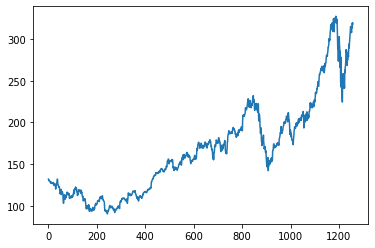

In [ ]:
plt.plot(df1)

In [ ]:
# scaling the data as LSTM is scale sensitive. so we are applying min_max_scaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
df1.shape

(1258, 1)

In [ ]:
# splitting the Dataset (train_test_split)
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size],df1[training_size:-1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
# creating an array of values into a dataset variable
import numpy as np
def creating_dataset(dataset,time_step=1):
  data_x,data_y = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step,0])
  return np.array(data_x),np.array(data_y)


In [ ]:
# reshaping into x =t, t+1,t+2,t+3
time_step = 100
X_train,y_train = creating_dataset(train_data,time_step)
X_test,y_test = creating_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [ ]:
print(X_train.shape), print(y_test.shape)

(716, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be[sample,time steps, features] which is required for LSTM 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [ ]:
#  creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences =True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences =True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size = 64)

Epoch 1/100
12/12 [==============================] - 18s 715ms/step - loss: 0.0218 - val_loss: 0.0386
Epoch 2/100
12/12 [==============================] - 5s 437ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 4/100
12/12 [==============================] - 3s 214ms/step - loss: 8.4667e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 3s 216ms/step - loss: 6.5022e-04 - val_loss: 0.0052
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 6.5509e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 3s 213ms/step - loss: 5.9877e-04 - val_loss: 0.0035
Epoch 8/100
12/12 [==============================] - 3s 214ms/step - loss: 5.9323e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 3s 217ms/step - loss: 6.2219e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 3s 216ms/ste

In [ ]:
#  Prediction and check the performance
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#  Transform to its original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
# calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.3916891766709

In [ ]:
# Test DATA RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

242.37775434531108

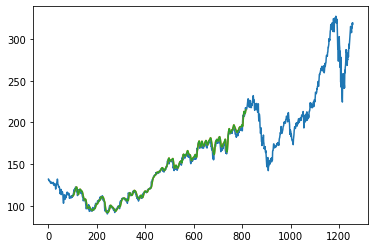

In [ ]:
# Ploting 
# shift train predictions for plotting 
look_back = 100
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction for plotting 
test_predict_plot = np.empty_like(df1)
test_predict_plot[:, :, ] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+2:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(train_predict_plot)